In [1]:
import nltk                                # Python library for NLP
# from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt            # library for visualization
import random                              # pseudo-random number generator
import pandas as pd                        #for reading data

https://www.kaggle.com/mustfkeskin/turkish-movie-sentiment-analysis-dataset

sitesinden indirdiğim verileri sanki tweet'miş gibi kullanıyorum.

In [2]:
movie_reviews = pd.read_csv("turkish_movie_sentiment_dataset.csv")

In [3]:
movie_reviews.head()

,comment,film_name,point
0,\n Jean Reno denince zate...,Sevginin Gücü,"5,0"
1,\n Ekşın falan izlemek is...,Sevginin Gücü,"5,0"
2,\n Bu yapım hakkında öyle...,Sevginin Gücü,"5,0"
3,\n finali yeter... (sting...,Sevginin Gücü,"5,0"
4,\n Jean Reno..\r\nbu adam...,Sevginin Gücü,"5,0"


In [4]:
movie_reviews.shape

(83227, 3)

In [5]:
movie_reviews['point'][0]

'5,0'

In [6]:
type(movie_reviews['point'][0])

str

In [7]:
float(movie_reviews['point'][0].replace(',','.'))

5.0

In [8]:
all_positive_tweets = list()
all_negative_tweets = list()
for i in range(movie_reviews.shape[0]):
    if(float(movie_reviews['point'][i].replace(',','.')) >= 2.5):
        all_positive_tweets.append(movie_reviews['comment'][i])
    else:
        all_negative_tweets.append(movie_reviews['comment'][i])


In [9]:
print('Number of positive tweets: ', len(all_positive_tweets))
print('Number of negative tweets: ', len(all_negative_tweets))

print('\nThe type of all_positive_tweets is: ', type(all_positive_tweets))
print('The type of a tweet entry is: ', type(all_negative_tweets[0]))

Number of positive tweets:  69263
Number of negative tweets:  13964

The type of all_positive_tweets is:  <class 'list'>
The type of a tweet entry is:  <class 'str'>


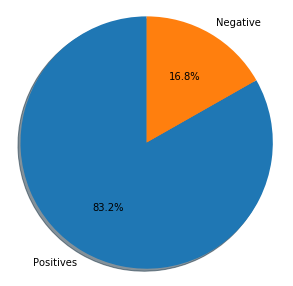

In [10]:
# Declare a figure with a custom size
fig = plt.figure(figsize=(5, 5))

# labels for the two classes
labels = 'Positives', 'Negative'

# Sizes for each slide
sizes = [len(all_positive_tweets), len(all_negative_tweets)] 

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

# Display the chart
plt.show()

In [11]:
# print positive in greeen
print('\033[92m' + all_positive_tweets[random.randint(0,5000)])

# print negative in red
print('\033[91m' + all_negative_tweets[random.randint(0,5000)])


                      Bu kadar geç izlediğim için yakınsamda izlemiş olmaktan ötürü aşırı sevinç doluyum çünkü bazı filmler naif olduğunuz zamanlarda çok paralel şekilde hayatınıza girer ve çıkmaz.Böyle bir deneyim oldu benim için.Fernanda Montenegro nun muhteşem performansı Vinícius de Oliveira nın tatlılığı ve sevginin, dostluğun, yaş farkına aldanmaksızın gelişen kusursuz bir bağın çok duygusal anlatımının birleşimi.10/10
        
            

                      bence çok iyi değil herkesin bu filmi niye beğendiğini anlamıyorum. sahneler yapım itibariyle çok abartılı kesinlikle tavsşye etmiyorum
        
            


In [12]:
# Our selected sample. Complex enough to exemplify each step
tweet = all_positive_tweets[2277]
print(tweet)


                      Tıpkı benim gibi sizde o küçük rahip adayında kendinizden birşeyler bulacaksınız..çok etkileyizi süper film mutlaka izleyin mutlaka..10
        
            


In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/ekrem/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

In [15]:
print('\033[92m' + tweet)
print('\033[94m')

# remove old style retweet text "RT"
# tweet2 = re.sub(r'^RT[\s]+', '', tweet)//Buna gerek yok zaten data twitter'dan değil

# remove hyperlinks
tweet2 = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)

# remove hashtags
# only removing the hash # sign from the word
tweet2 = re.sub(r'#', '', tweet2)

print(tweet2)


                      Tıpkı benim gibi sizde o küçük rahip adayında kendinizden birşeyler bulacaksınız..çok etkileyizi süper film mutlaka izleyin mutlaka..10
        
            


                      Tıpkı benim gibi sizde o küçük rahip adayında kendinizden birşeyler bulacaksınız..çok etkileyizi süper film mutlaka izleyin mutlaka..10
        
            


In [16]:
print()
print('\033[92m' + tweet2)
print('\033[94m')

# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

# tokenize tweets
tweet_tokens = tokenizer.tokenize(tweet2)

print()
print('Tokenized string:')
print(tweet_tokens)



                      Tıpkı benim gibi sizde o küçük rahip adayında kendinizden birşeyler bulacaksınız..çok etkileyizi süper film mutlaka izleyin mutlaka..10
        
            


Tokenized string:
['tıpkı', 'benim', 'gibi', 'sizde', 'o', 'küçük', 'rahip', 'adayında', 'kendinizden', 'birşeyler', 'bulacaksınız', '..', 'çok', 'etkileyizi', 'süper', 'film', 'mutlaka', 'izleyin', 'mutlaka', '..', '10']


In [17]:
#Import the english stop words list from NLTK
stopwords_english = stopwords.words('turkish') 

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['acaba', 'ama', 'aslında', 'az', 'bazı', 'belki', 'biri', 'birkaç', 'birşey', 'biz', 'bu', 'çok', 'çünkü', 'da', 'daha', 'de', 'defa', 'diye', 'eğer', 'en', 'gibi', 'hem', 'hep', 'hepsi', 'her', 'hiç', 'için', 'ile', 'ise', 'kez', 'ki', 'kim', 'mı', 'mu', 'mü', 'nasıl', 'ne', 'neden', 'nerde', 'nerede', 'nereye', 'niçin', 'niye', 'o', 'sanki', 'şey', 'siz', 'şu', 'tüm', 've', 'veya', 'ya', 'yani']

Punctuation

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [18]:
print()
print('\033[92m')
print(tweet_tokens)
print('\033[94m')

tweets_clean = []

for word in tweet_tokens: # Go through every word in your tokens list
    if (word not in stopwords_english and  # remove stopwords
        word not in string.punctuation):  # remove punctuation
        tweets_clean.append(word)

print('removed stop words and punctuation:')
tüprint(tweets_clean)



['tıpkı', 'benim', 'gibi', 'sizde', 'o', 'küçük', 'rahip', 'adayında', 'kendinizden', 'birşeyler', 'bulacaksınız', '..', 'çok', 'etkileyizi', 'süper', 'film', 'mutlaka', 'izleyin', 'mutlaka', '..', '10']

removed stop words and punctuation:


NameError: name 'tüprint' is not defined

Türkçe stemming için snowballstemmer kullandım.

conda install snowballstemmer

yazıp kullanabiliyoruz.

In [19]:
from snowballstemmer import TurkishStemmer

In [20]:
print()
print('\033[92m')
print(tweets_clean)
print('\033[94m')

# Instantiate stemming class
stemmer = TurkishStemmer() 

# Create an empty list to store the stems
tweets_stem = [] 

for word in tweets_clean:
    stem_word = stemmer.stemWord(word)  # stemming word
    tweets_stem.append(stem_word)  # append to the list

print('stemmed words:')
print(tweets_stem)



['tıpkı', 'benim', 'sizde', 'küçük', 'rahip', 'adayında', 'kendinizden', 'birşeyler', 'bulacaksınız', '..', 'etkileyizi', 'süper', 'film', 'mutlaka', 'izleyin', 'mutlaka', '..', '10']

stemmed words:
['tıpkı', 'be', 'siz', 'küçük', 'rahip', 'aday', 'kendi', 'birşey', 'bulacak', '..', 'etkileyiz', 'süper', 'film', 'mutlak', 'izley', 'mutlak', '..', '10']


In [22]:
from utils import process_tweet # Import the process_tweet function

# choose the same tweet
tweet = all_positive_tweets[2277]

print()
print('\033[92m')
print(tweet)
print('\033[94m')

# call the imported function
tweets_stem = process_tweet(tweet); # Preprocess a given tweet

print('preprocessed tweet:')
print(tweets_stem) # Print the result




                      Tıpkı benim gibi sizde o küçük rahip adayında kendinizden birşeyler bulacaksınız..çok etkileyizi süper film mutlaka izleyin mutlaka..10
        
            

preprocessed tweet:
['tıpkı', 'be', 'siz', 'küçük', 'rahip', 'aday', 'kendi', 'birşey', 'bulacak', '..', 'etkileyiz', 'süper', 'film', 'mutlak', 'izley', 'mutlak', '..', '10']
